# 8/10

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("AmesHousing.csv")

In [3]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [5]:
# First remove useless columns (es:Order that has incremental orders, but not much information)
# Figure out if PID is a row identifier
df["Order"].nunique() #tells me how many unique values i have in this column
df["PID"].nunique()

2930

In [6]:
# both columns are unique identifiers...we can decide to remove one. Let's keep PID because if there were 
# other tables it could be linked to them
df.drop(columns=["Order"], inplace=True) # inplace True significa che modifica quella originale 

In [9]:
df # we have removed the Order column, now we have 81 columns.

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [10]:
df.set_index("PID",inplace=True) # utilizzo come index del df la colonna PID

In [12]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


In [13]:
# figure out what kind of columns we have
for key,value in df.dtypes.items():
    print(key,value)

MS SubClass int64
MS Zoning object
Lot Frontage float64
Lot Area int64
Street object
Alley object
Lot Shape object
Land Contour object
Utilities object
Lot Config object
Land Slope object
Neighborhood object
Condition 1 object
Condition 2 object
Bldg Type object
House Style object
Overall Qual int64
Overall Cond int64
Year Built int64
Year Remod/Add int64
Roof Style object
Roof Matl object
Exterior 1st object
Exterior 2nd object
Mas Vnr Type object
Mas Vnr Area float64
Exter Qual object
Exter Cond object
Foundation object
Bsmt Qual object
Bsmt Cond object
Bsmt Exposure object
BsmtFin Type 1 object
BsmtFin SF 1 float64
BsmtFin Type 2 object
BsmtFin SF 2 float64
Bsmt Unf SF float64
Total Bsmt SF float64
Heating object
Heating QC object
Central Air object
Electrical object
1st Flr SF int64
2nd Flr SF int64
Low Qual Fin SF int64
Gr Liv Area int64
Bsmt Full Bath float64
Bsmt Half Bath float64
Full Bath int64
Half Bath int64
Bedroom AbvGr int64
Kitchen AbvGr int64
Kitchen Qual object
TotRms 

In [15]:
# we want to look at numerical data separately than categorical data
# spilt them:
# NUMERICAL
df_num = df.select_dtypes([int,float]) # selecte subsets of the columns based on data type
# we could also do df.select_dtypes(np.number)

In [16]:
# CATEGORICAL
df_cat = df.select_dtypes(include="object")
df_cat

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
PID,,,,,,,,,,,,,,,,,,,,,
526301100,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
526350040,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
526351010,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
526353030,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
527105010,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
923276100,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
923400125,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [17]:
df_num

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500
923276100,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000
923400125,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000


In [18]:
df_num.columns #look at informations

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [19]:
import matplotlib.pyplot as plt

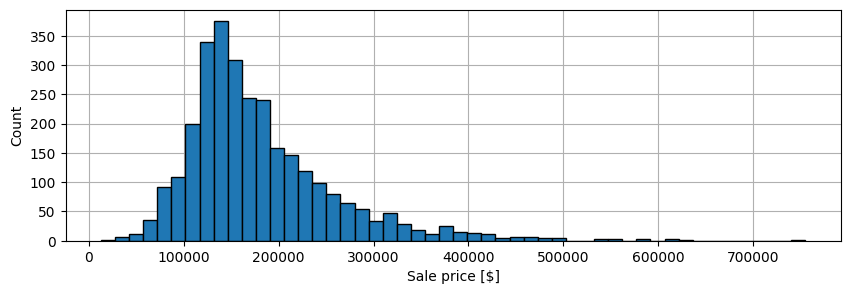

In [20]:
fig, ax = plt.subplots(figsize=(10,3)) # imposta la dimensione della figura in pollici
ax.hist(df["SalePrice"], bins=50, edgecolor="k") 
# bins divide i dati in 50 intervalli
# edgecolor=k imposta il colore del bordo delle barre a nero
ax.set_xlabel("Sale price [$]")
ax.set_ylabel("Count")
ax.grid()
ax.set_axisbelow(True) #grid in background

In [21]:
df["SalePrice"].mean()

np.float64(180796.0600682594)

In [22]:
df["SalePrice"].mode()

0    135000
Name: SalePrice, dtype: int64

In [23]:
df["SalePrice"].median()

np.float64(160000.0)

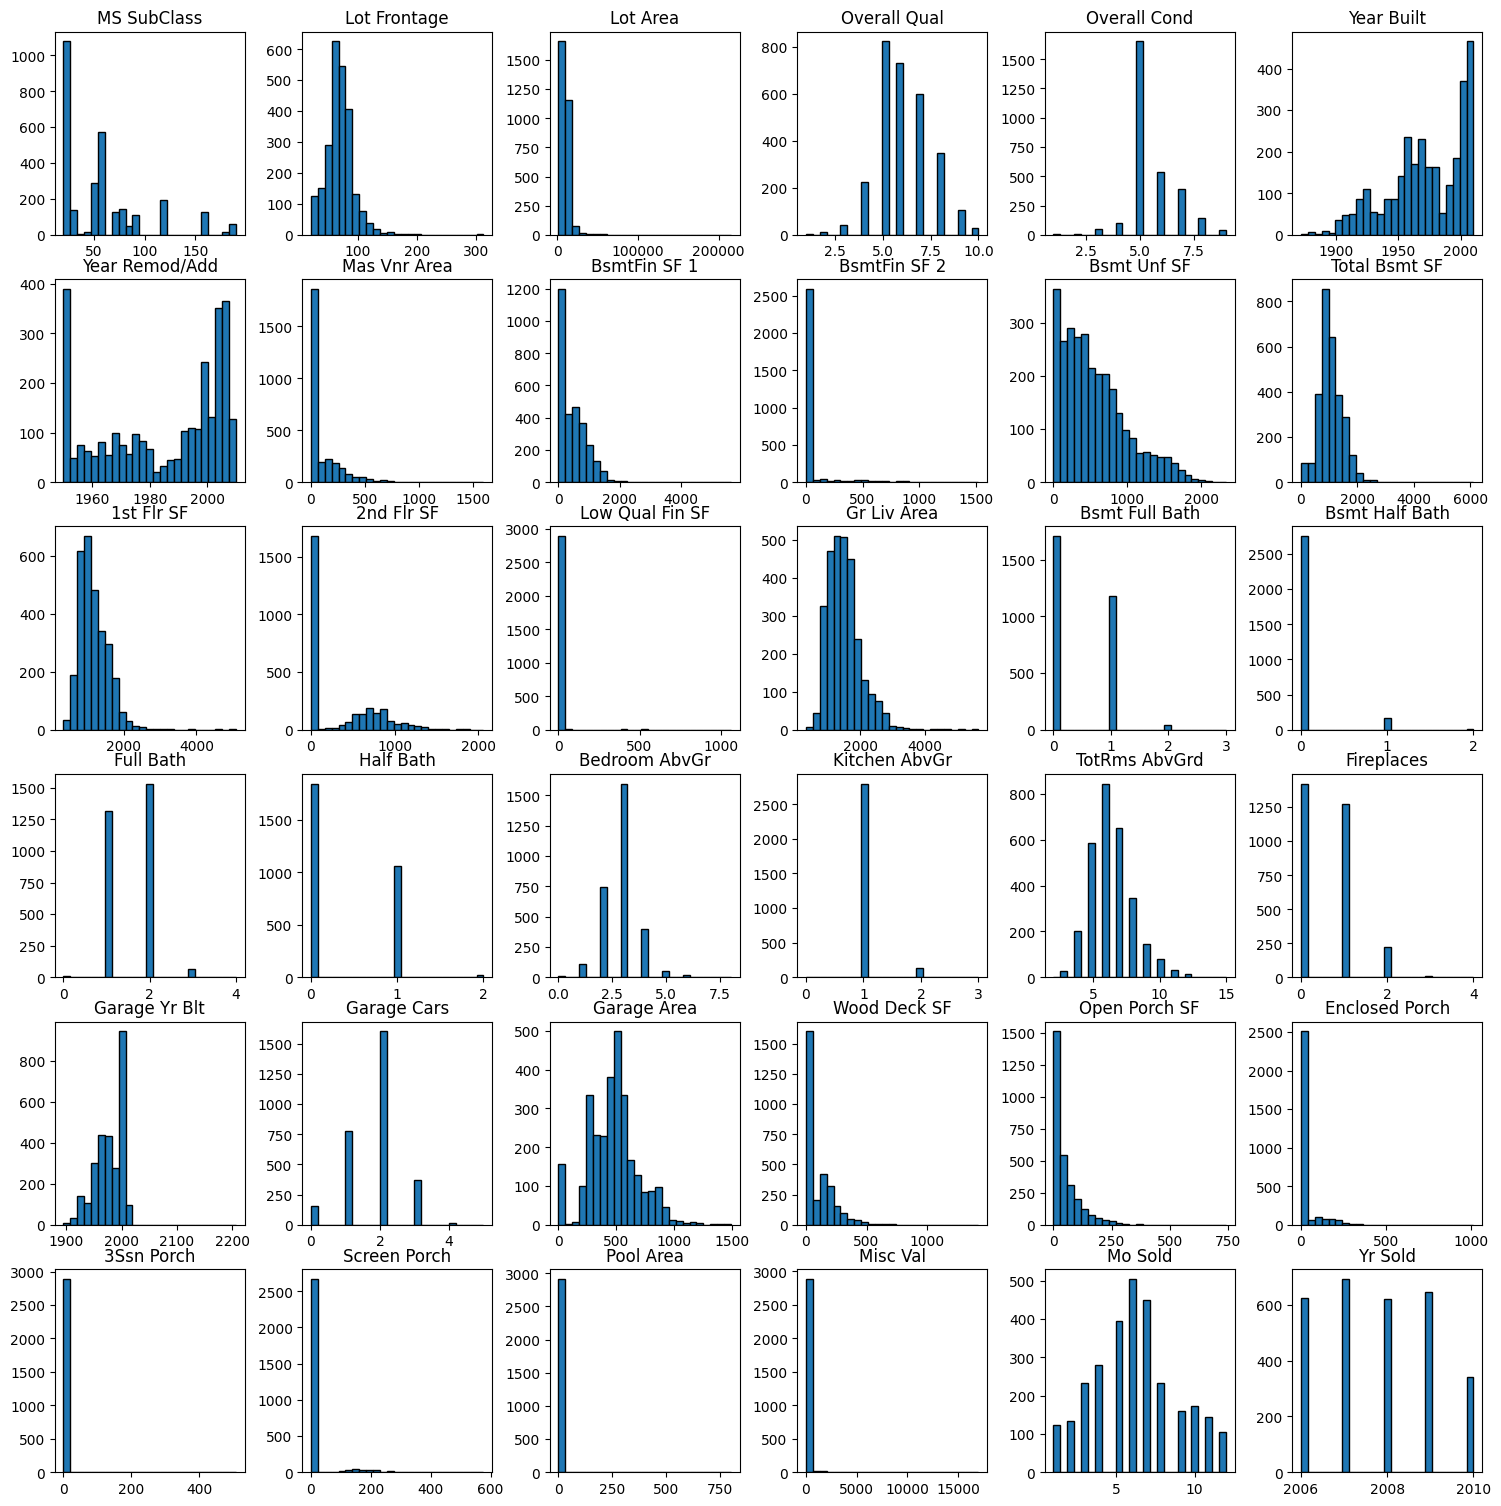

In [24]:
# griglia di 6×6 sotto-grafici
# ogni elemento ax[i,j] è un grafico diverso
fig, ax = plt.subplots(6,6,figsize=(15,15))
plt.tight_layout() # Sistema automaticamente gli spazi tra i grafici per evitare che le etichette o i titoli si sovrappongano.
for i in range(6):
    for j in range(6):
        col_index = i*6 + j # serve a convertire la coppia (i,j) in un singolo indice (da 0 a 35).
        # Recupero il nome della colonna corrispondente all’indice col_index nel DataFrame df_num.
        col_name = df_num.columns[col_index]
        ax[i,j].set_title(col_name) # Imposta come titolo del grafico il nome della colonna
        # Disegno un istogramma dei valori della colonna col_name
        ax[i,j].hist(df_num[col_name], bins=25, edgecolor="k")

In [25]:
df["Garage Yr Blt"].max() # viene un valore di anno nel futuro --> PROBLEMA!

np.float64(2207.0)

In [27]:
df["Garage Yr Blt"].sort_values().dropna()[-5:]

PID
916386020    2010.0
527258010    2010.0
528120060    2010.0
528175010    2010.0
916384070    2207.0
Name: Garage Yr Blt, dtype: float64

In [28]:
df.loc[916384070]["Year Built"]

np.int64(2006)

In [29]:
df.loc[916384070]["Year Remod/Add"]

np.int64(2007)

# 13/10

In [30]:
df.loc[916384070, "Garage Yr Blt"] = 2007 # #modifico il valore e lo metto più verosimile

**MISSING VALUES**

In [32]:
# we want to find missing values 
s_missing = df.isna().mean() # mean value of each column --> fraction of missing value for each column
# it's going to be zero if there are no missing values, otherwise it's going to be a number > 0
s_missing

MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.167235
Lot Area          0.000000
Street            0.000000
                    ...   
Mo Sold           0.000000
Yr Sold           0.000000
Sale Type         0.000000
Sale Condition    0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [33]:
# keep only features that have missing values and calculate the percentage of missing values in the column
s_missing[s_missing > 0] * 100

Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type      60.580205
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Cars        0.034130
Garage Area        0.034130
Garage Qual        5.426621
Garage Cond        5.426621
Pool QC           99.556314
Fence             80.477816
Misc Feature      96.382253
dtype: float64

In [38]:
# some feature have a very high percentage of missing values --> we may consider discarding the feature because we don't have useful information
# DISCARD FEATURES:
# create a list of columns we want to discard and then discard them with drop function 
s_missing[s_missing>0.4].index # #list of columns I want to drop (because they have more than 40% missing values) 

Index(['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [43]:
df.drop(columns=s_missing[s_missing > 0.4].index, inplace=True, errors="ignore") # errors="ignore" elimina solo quelle effettivamente presenti
# errors="ignore" ha solo tolto il controllo di coerenza del tipo di dato, e Pandas ha potuto procedere con l’eliminazione.

In [44]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000


In [45]:
# We still have columns with missing values, just less. What do I do with them? I can fill the missing values with some reasoned constant
s_missing = df.isna().mean()
s_missing[s_missing > 0]

Lot Frontage      0.167235
Mas Vnr Area      0.007850
Bsmt Qual         0.027304
Bsmt Cond         0.027304
Bsmt Exposure     0.028328
BsmtFin Type 1    0.027304
BsmtFin SF 1      0.000341
BsmtFin Type 2    0.027645
BsmtFin SF 2      0.000341
Bsmt Unf SF       0.000341
Total Bsmt SF     0.000341
Electrical        0.000341
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
Garage Type       0.053584
Garage Yr Blt     0.054266
Garage Finish     0.054266
Garage Cars       0.000341
Garage Area       0.000341
Garage Qual       0.054266
Garage Cond       0.054266
dtype: float64

In [47]:
df.fillna(0) # Sostituisce tutti i valori mancanti (NaN) del DataFrame df con il valore 0
# Di default, fillna() restituisce una copia modificata del DataFrame.
# L’originale df rimane invariato. --> se voglio kodificare l'originale uso inplace=True

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
923276100,20,RL,0.0,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000


In [49]:
# For numerical feature I could fill the missing values with the mean of the other value
# For categorical featuers I could put the most used value (mode)
df_num = df.select_dtypes([int,float])
df_cat = df.select_dtypes(include="object")

In [50]:
df_num

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500
923276100,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000
923400125,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000


In [51]:
df_cat

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
PID,,,,,,,,,,,,,,,,,,,,,
526301100,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
526350040,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
526351010,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
526353030,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
527105010,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
923276100,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
923400125,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [52]:
df_num.mean() # type is a Series

(MS SubClass            57.387372
 Lot Frontage           69.224590
 Lot Area            10147.921843
 Overall Qual            6.094881
 Overall Cond            5.563140
 Year Built           1971.356314
 Year Remod/Add       1984.266553
 Mas Vnr Area          101.896801
 BsmtFin SF 1          442.629566
 BsmtFin SF 2           49.722431
 Bsmt Unf SF           559.262547
 Total Bsmt SF        1051.614544
 1st Flr SF           1159.557679
 2nd Flr SF            335.455973
 Low Qual Fin SF         4.676792
 Gr Liv Area          1499.690444
 Bsmt Full Bath          0.431352
 Bsmt Half Bath          0.061134
 Full Bath               1.566553
 Half Bath               0.379522
 Bedroom AbvGr           2.854266
 Kitchen AbvGr           1.044369
 TotRms AbvGrd           6.443003
 Fireplaces              0.599317
 Garage Yr Blt        1978.060267
 Garage Cars             1.766815
 Garage Area           472.819734
 Wood Deck SF           93.751877
 Open Porch SF          47.533447
 Enclosed Porc

In [54]:
df_cat.mode() # type is a dataframe

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [55]:
type(df_num.mean())

pandas.core.series.Series

In [57]:
type(df_cat.mode()) # #this is a DF. I want to convert it into a series

pandas.core.frame.DataFrame

In [58]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000


In [59]:
# #for each column it fills the NaN either with the mean or with the mode
df.fillna(pd.concat([df_num.mean(), df_cat.mode().iloc[0]]), inplace=True)
# f_cat.mode().iloc[0] prende la prima riga del risultato (la moda principale, nel caso ci siano più mode)
# Quindi ottieni una Series che contiene un valore “di riempimento” per ogni colonna di df.
# fillna riempie tutti i NaN in df usando quella Series come “mappa”:
# - Se la colonna è numerica, usa la media corrispondente.
# - Se è categorica, usa la moda corrispondente.

In [60]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.00000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
923400125,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000


**CORRELATION**

In [64]:
# CORRELATION
df_num = df.select_dtypes(include=np.number) # or [int, float]
df_cat = df.select_dtypes(include="object")
df_num.values.shape, df_cat.values.shape

((2930, 37), (2930, 37))

In [65]:
df_num

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.00000,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
526350040,20,80.00000,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
526351010,20,81.00000,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
526353030,20,93.00000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
527105010,60,74.00000,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,37.00000,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500
923276100,20,69.22459,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000
923400125,85,62.00000,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000


In [66]:
df_cat

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
PID,,,,,,,,,,,,,,,,,,,,,
526301100,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
526350040,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
526351010,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
526353030,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
527105010,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
923276100,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
923400125,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


[Text(0, 0, 'MS SubClass'),
 Text(0, 1, 'Lot Frontage'),
 Text(0, 2, 'Lot Area'),
 Text(0, 3, 'Overall Qual'),
 Text(0, 4, 'Overall Cond'),
 Text(0, 5, 'Year Built'),
 Text(0, 6, 'Year Remod/Add'),
 Text(0, 7, 'Mas Vnr Area'),
 Text(0, 8, 'BsmtFin SF 1'),
 Text(0, 9, 'BsmtFin SF 2'),
 Text(0, 10, 'Bsmt Unf SF'),
 Text(0, 11, 'Total Bsmt SF'),
 Text(0, 12, '1st Flr SF'),
 Text(0, 13, '2nd Flr SF'),
 Text(0, 14, 'Low Qual Fin SF'),
 Text(0, 15, 'Gr Liv Area'),
 Text(0, 16, 'Bsmt Full Bath'),
 Text(0, 17, 'Bsmt Half Bath'),
 Text(0, 18, 'Full Bath'),
 Text(0, 19, 'Half Bath'),
 Text(0, 20, 'Bedroom AbvGr'),
 Text(0, 21, 'Kitchen AbvGr'),
 Text(0, 22, 'TotRms AbvGrd'),
 Text(0, 23, 'Fireplaces'),
 Text(0, 24, 'Garage Yr Blt'),
 Text(0, 25, 'Garage Cars'),
 Text(0, 26, 'Garage Area'),
 Text(0, 27, 'Wood Deck SF'),
 Text(0, 28, 'Open Porch SF'),
 Text(0, 29, 'Enclosed Porch'),
 Text(0, 30, '3Ssn Porch'),
 Text(0, 31, 'Screen Porch'),
 Text(0, 32, 'Pool Area'),
 Text(0, 33, 'Misc Val'),
 Text

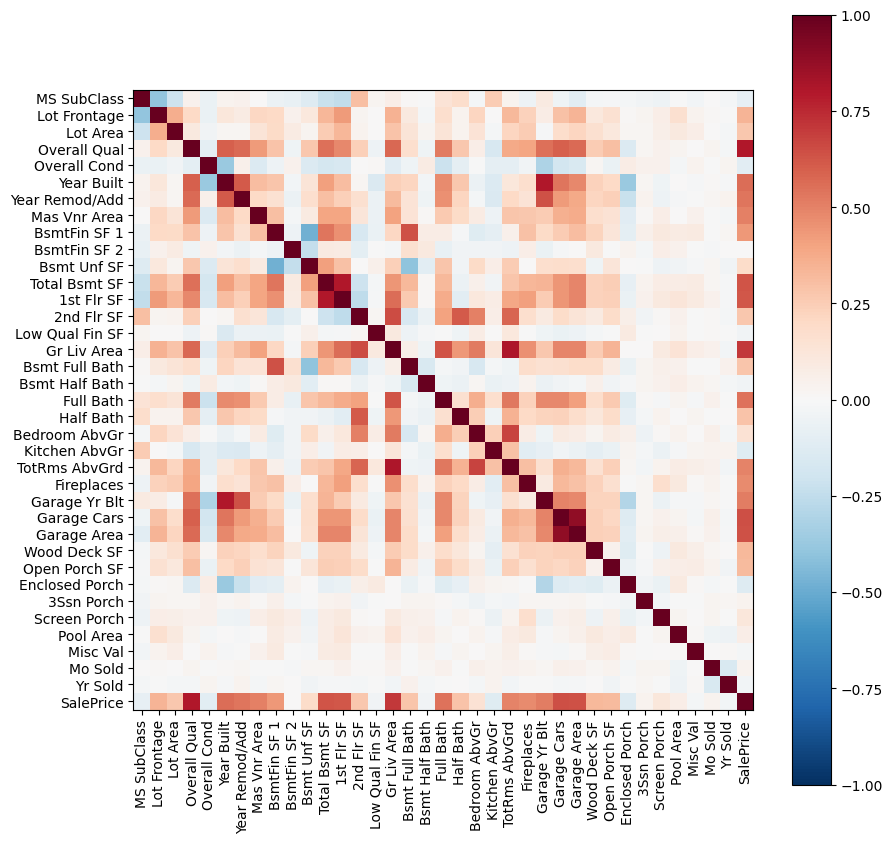

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
# correlation matrix --> #takes as input 1 or 2 sets of variables and computes the correlation matrix. I transpose the values because I want
#as rows the variables (features)
corr_mat = np.corrcoef(df_num.values.T) # the shape is (37,37) in position i,j contains the correlation between i and j
# np.corrcoef(df_num.values.T)[10,15] #correlation between feature 10 and 15
# np.corrcoef(df_num.values.T)[15,15] #correlation between a feature and itself is 1

cm = ax.imshow(corr_mat, cmap="RdBu_r", vmin=-1, vmax=+1) #visualize some kind of color map
#colormaps map ranges of values to ranges of colors
#I give the min and max of correlation range so that the colors fit my range
fig.colorbar(cm)
ax.set_xticks(range(len(df_num.columns))) # things we have on x axis
ax.set_xticklabels(df_num.columns, rotation=90) 

ax.set_yticks(range(len(df_num.columns)))
ax.set_yticklabels(df_num.columns)

In [68]:
df_num

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.00000,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
526350040,20,80.00000,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
526351010,20,81.00000,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
526353030,20,93.00000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
527105010,60,74.00000,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,37.00000,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500
923276100,20,69.22459,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000
923400125,85,62.00000,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000


**SCATTER PLOT**

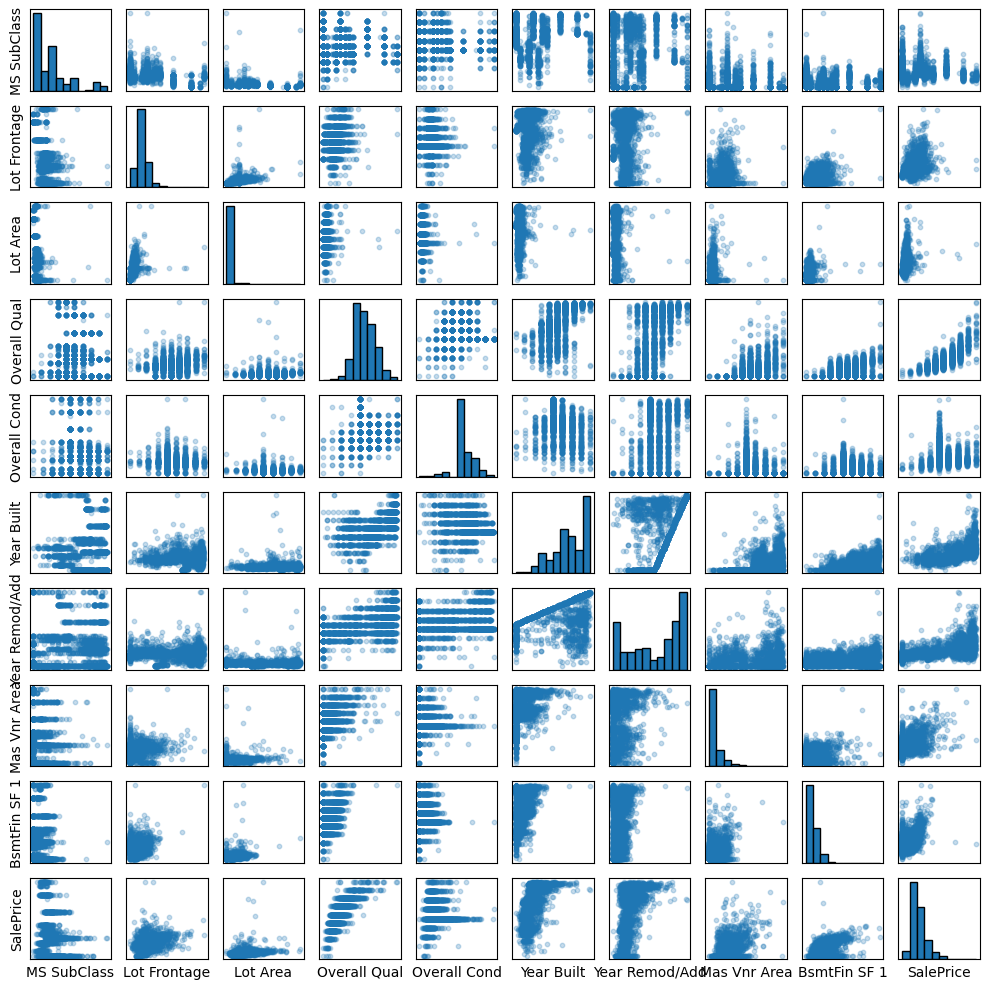

In [70]:
side =10 # I want analyze the firts ten features
col_names = list(df_num.columns[:side-1])+["SalePrice"]
fig,ax = plt.subplots(side,side, figsize=(10,10))

for i in range(side):
    for j in range(side):
        if i==j: # so if we are on the diagonal
            ax[i,j].hist(df_num[col_names[i]], bins=10, edgecolor='k')
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
        else:
            ax[i,j].scatter(df_num[col_names[i]], df_num[col_names[j]], s=10, alpha=0.25) # alpha Trasparenza = 25% makes points more transparent --> if I have an outlier it will not be very visualizable
            # s --> Dimensione dei punti (piccoli = 10 pixel)
            # if I have many points in the same region, they will sovrapporsi and so the color will be more evident
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])

        if j==0: # for all plots on the left
            ax[i,j].set_ylabel(col_names[i])
        if i==side-1:
            ax[i,j].set_xlabel(col_names[j])
plt.tight_layout()

In [71]:
np.corrcoef(df_num["SalePrice"], df_num["Year Built"])

array([[1.        , 0.55842611],
       [0.55842611, 1.        ]])

In [72]:
from scipy.stats import spearmanr

In [73]:
# calcolare la correlazione di Spearman tra due variabili numeriche.
# Correlazione di Spearman = misura la relazione monotona tra due variabili, non necessariamente lineare.
spearmanr(df_num["SalePrice"], df_num["Year Built"]).statistic
# statistic → coefficiente di Spearman (tra -1 e 1)
# 1 → correlazione positiva perfetta
# -1 → correlazione negativa perfetta
# 0 → nessuna correlazione monotona

np.float64(0.6808223586258559)

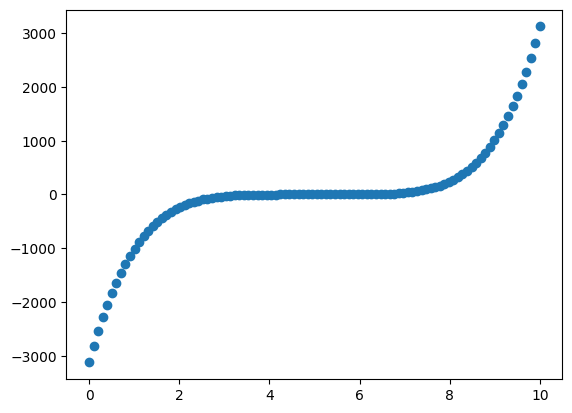

In [75]:
x = np.linspace(0,10,100)
y = (x-5)**5
fig, ax = plt.subplots()
ax.scatter(x,y)
# Questo codice crea un grafico a dispersione della funzione 𝑦=(𝑥−5)^5 per x tra 0 e 10.
# Si vedrà una curva che passa per lo 0 a x=5, con valori negativi a sinistra e positivi a destra, molto piatta vicino allo zero e ripida allontanandosi da 5.

In [76]:
np.corrcoef(x, y)

array([[1.        , 0.82087067],
       [0.82087067, 1.        ]])

In [77]:
spearmanr(x,y).statistic # there is perfecrt correlation 

np.float64(0.9999999999999999)

**DUMMY ENCODING**

In [78]:
df_cat # we want to see how to convert this matrix in open coded values

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
PID,,,,,,,,,,,,,,,,,,,,,
526301100,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
526350040,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
526351010,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
526353030,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
527105010,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
923276100,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
923400125,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [79]:
df_enc = pd.get_dummies(df_cat, prefix_sep="=")
# output = more columns (number of columns we need to give one column for EACH value of each feature)
# Trasforma ogni colonna categorica in più colonne binarie (0/1).
# prefix="=" Modifica come viene scritto il nome della nuova colonna.
# df_enc è il nuovo DataFrame solo numerico, pronto per essere usato in modelli di machine learning. Tutte le colonne sono 0/1.
# --> trasformo le colonne categoriche in colonne binarie, una per ogni categoria, con nomi nel formato Colonna=Categoria.

In [80]:
df_enc

,MS Zoning=A (agr),MS Zoning=C (all),MS Zoning=FV,MS Zoning=I (all),MS Zoning=RH,MS Zoning=RL,MS Zoning=RM,Street=Grvl,Street=Pave,Lot Shape=IR1,...,Sale Type=New,Sale Type=Oth,Sale Type=VWD,Sale Type=WD,Sale Condition=Abnorml,Sale Condition=AdjLand,Sale Condition=Alloca,Sale Condition=Family,Sale Condition=Normal,Sale Condition=Partial
PID,,,,,,,,,,,,,,,,,,,,,
526301100,False,False,False,False,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,True,False
526350040,False,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
526351010,False,False,False,False,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,True,False
526353030,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
527105010,False,False,False,False,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,False,False,False,False,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,True,False
923276100,False,False,False,False,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,True,False
923400125,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


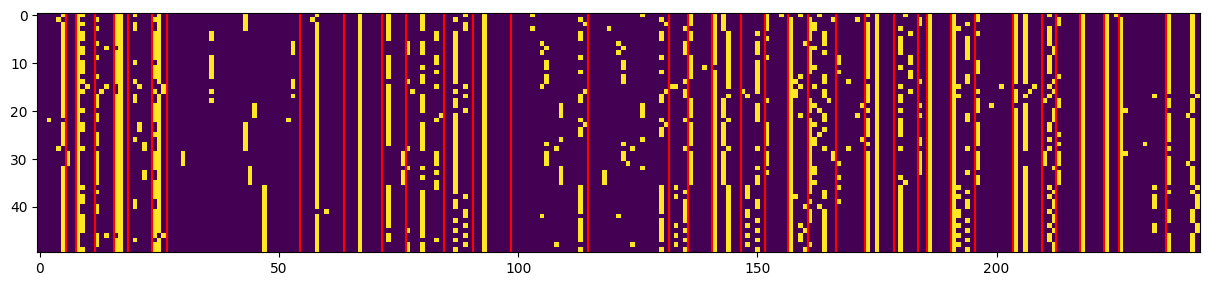

In [82]:
# Questo codice serve a visualizzare le colonne binarizzate di un DataFrame categorico con linee che separano le diverse feature, 
# in pratica un modo grafico per capire come le colonne one-hot encoding sono organizzate.
fig,ax = plt.subplots(figsize=(15,5))

df_encoded = pd.get_dummies(df_cat, prefix_sep="=")
pos_changes = [] # Lista vuota per salvare gli indici in cui cambia la feature originale
# voglio rendere visibili nel plot le separazioni tra FEATURES con delle linee rosse. Mi salvo in un array gli indici delle colonne che non riguardano piu la stessa feature (cioè dove CAMBIA feature)
for pos in range(len(df_encoded.columns)-1):
    # Confronta la parte prima del simbolo = tra colonna pos e colonna pos+1.
    if df_encoded.columns[pos].split("=")[0] != df_encoded.columns[pos+1].split("=")[0]: #se sono diversi (non piu stessa feature)
        pos_changes.append(pos) # mi salvo la posizione in cui cambia
        # pos_changes contiene tutte le colonne dove finisce un gruppo di dummy per una feature e inizia un’altra.

ax.imshow(df_encoded.values[:50]) # Ogni riga = una osservazione, ogni colonna = una variabile binarizzata.
# df_encoded.values[:50] prende le prime 50 righe del DataFrame codificato.
for pos in pos_changes:
    ax.axvline(pos - 0.5, c='r') #visualizzo la linea in cui cambia feature, così ho nel grafico i "settori" delle features
    # Disegna una linea verticale rossa (c='r') in corrispondenza degli indici salvati in pos_changes.
    # pos - 0.5 serve a allineare la linea tra le colonne, non sopra la colonna.

# Il grafico finale mostra:
# Una mappa di valori binari (0/1) delle prime 50 righe delle feature categoriche codificate.
# Linee rosse verticali che separano le diverse feature originali.
# È utile per capire come le colonne codificate si raggruppano per feature, e visualizzare rapidamente la struttura dei dati binarizzati.